In [1]:
%matplotlib inline
import stumpy
import pandas as pd
import numpy as np
from IPython.display import IFrame
from matplotlib.patches import Rectangle
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns
from sklearn.linear_model import LinearRegression
plt.style.use('https://raw.githubusercontent.com/TDAmeritrade/stumpy/main/docs/stumpy.mplstyle')

In [2]:
df612 = pd.read_csv('20180612.csv')

In [3]:
df612 = df612.rename(columns={'Time (h)': 'time', 'Mass (ng)': 'mass', 'Mean mass (ng)' : 'mean'})
df612 = df612.drop(['mean'], axis = 1)
df612 = df612.dropna()

In [4]:
df11 = pd.read_csv('20180711.csv')

In [5]:
df11 = df11.rename(columns={'Time (h)': 'time', 'Mass (ng)': 'mass', 'Mean mass (ng)' : 'mean'})
df11 = df11.drop(['mean'], axis = 1)
df11 = df11.dropna()

In [6]:
df712 = pd.read_csv('20180712.csv')

In [7]:
df712 = df712.rename(columns={'Time [h]': 'time', 'Mass [ng]': 'mass', 'Mean mass [ng]' : 'mean'})
df712 = df712.drop(['mean'], axis = 1)
df712 = df712.dropna()

In [8]:
df17Y1 = pd.read_csv('20191017Y1.csv')

In [9]:
df17Y1 = df17Y1.rename(columns={'Time (h)': 'time', 'Mass (ng)': 'mass', 'Mean mass (ng)' : 'mean'})
df17Y1 = df17Y1.drop(['mean'], axis = 1)
df17Y1 = df17Y1.dropna()

In [10]:
df17Y2 = pd.read_csv('20191017Y2.csv')

In [11]:
df17Y2 = df17Y2.rename(columns={'Time (h)': 'time', 'Mass (ng)': 'mass', 'Mean mass (ng)' : 'mean'})
df17Y2 = df17Y2.drop(['mean'], axis = 1)
df17Y2 = df17Y2.dropna()

In [12]:
df18Y2 = pd.read_csv('20191018Y2.csv')

In [13]:
df18Y2 = df18Y2.rename(columns={'Time (h)': 'time', 'Mass (ng)': 'mass', 'Mean mass (ng)' : 'mean'})
df18Y2 = df18Y2.drop(['mean'], axis = 1)
df18Y2 = df18Y2.dropna()

In [14]:
df21Y1 = pd.read_csv('20191021Y1.csv')

In [15]:
df21Y1 = df21Y1.rename(columns={'Time (h)': 'time', 'Mass (ng)': 'mass', 'Mean mass (ng)' : 'mean'})
df21Y1 = df21Y1.drop(['mean'], axis = 1)
df21Y1 = df21Y1.dropna()

# Plotting All Datasets

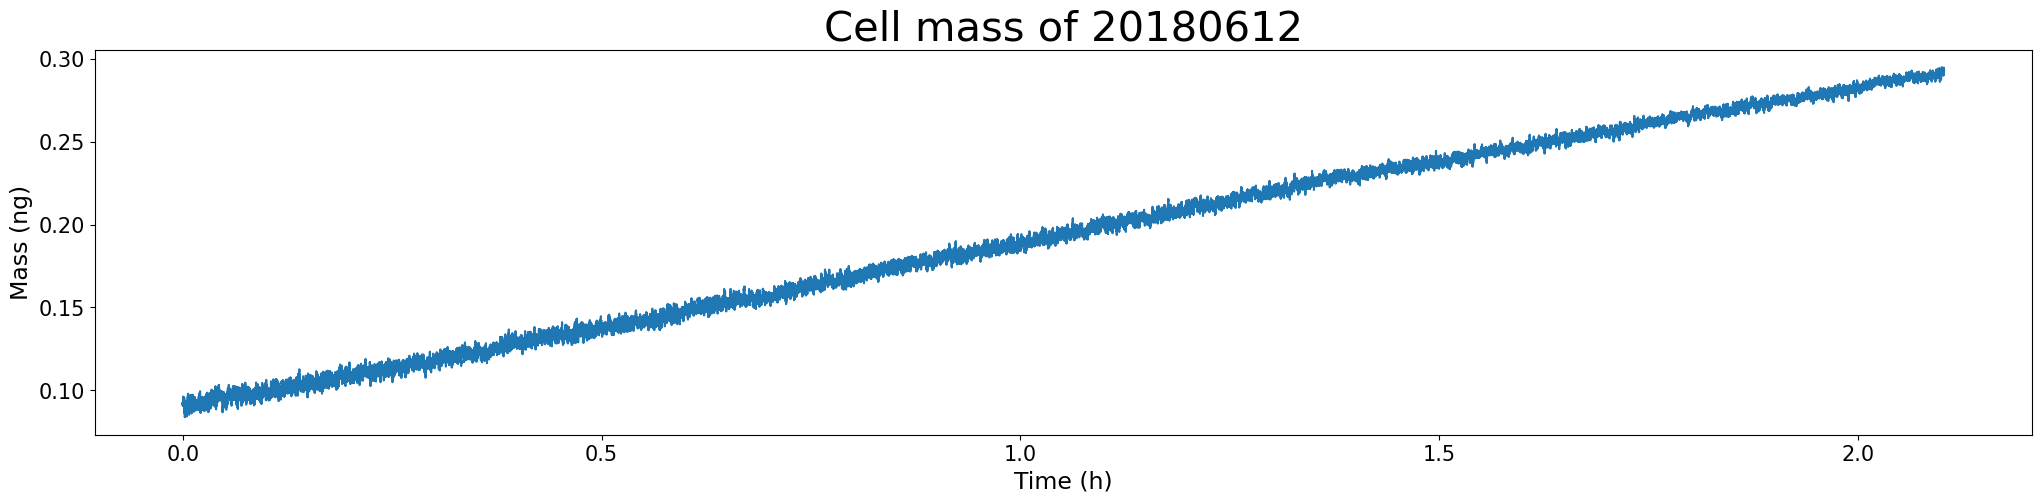

In [16]:
#df612
plt.figure(figsize=(25, 5))
plt.plot(df612["time"],df612["mass"] )
plt.title("Cell mass of 20180612", fontdict={"fontsize": 30})
plt.xlabel('Time (h)', fontsize=17)
plt.ylabel('Mass (ng)', fontsize=17)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

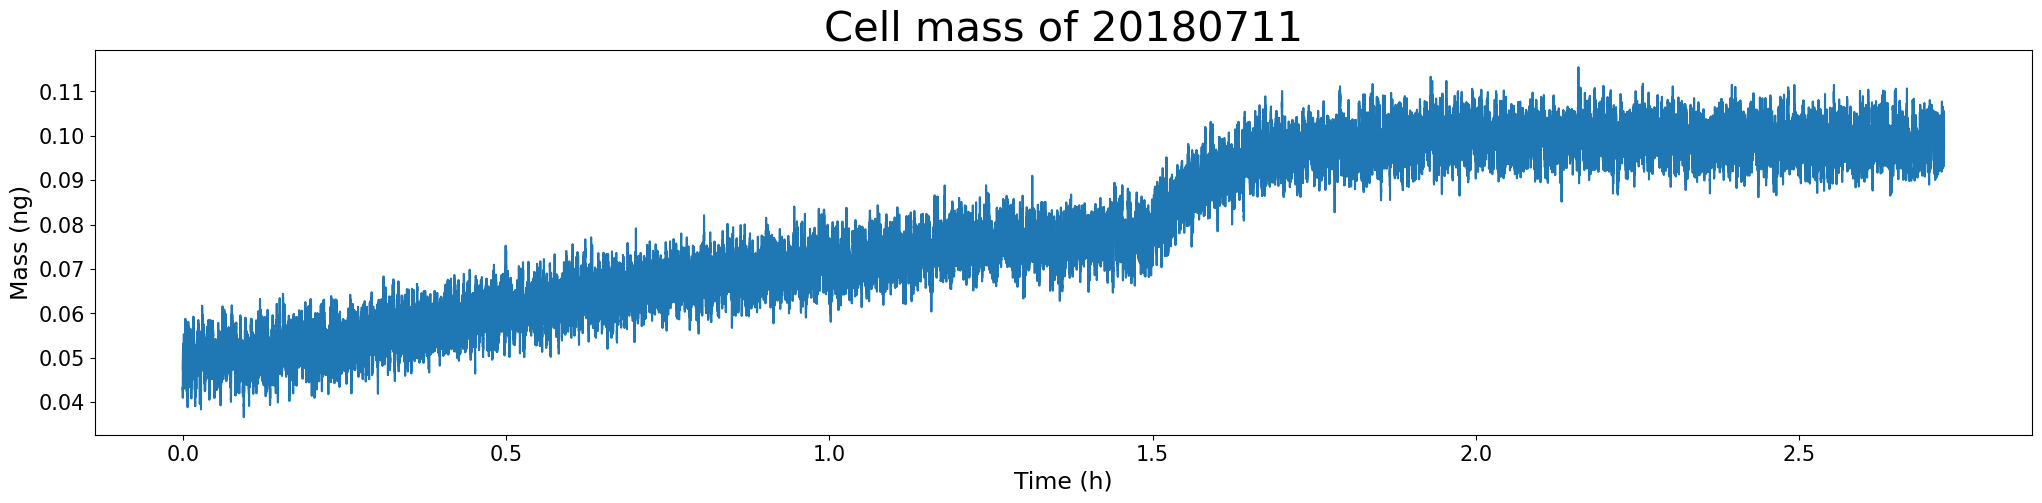

In [17]:
#df11
plt.figure(figsize=(25, 5))
plt.plot(df11["time"],df11["mass"] )
plt.title("Cell mass of 20180711", fontdict={"fontsize": 30})
plt.xlabel('Time (h)', fontsize=17)
plt.ylabel('Mass (ng)', fontsize=17)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

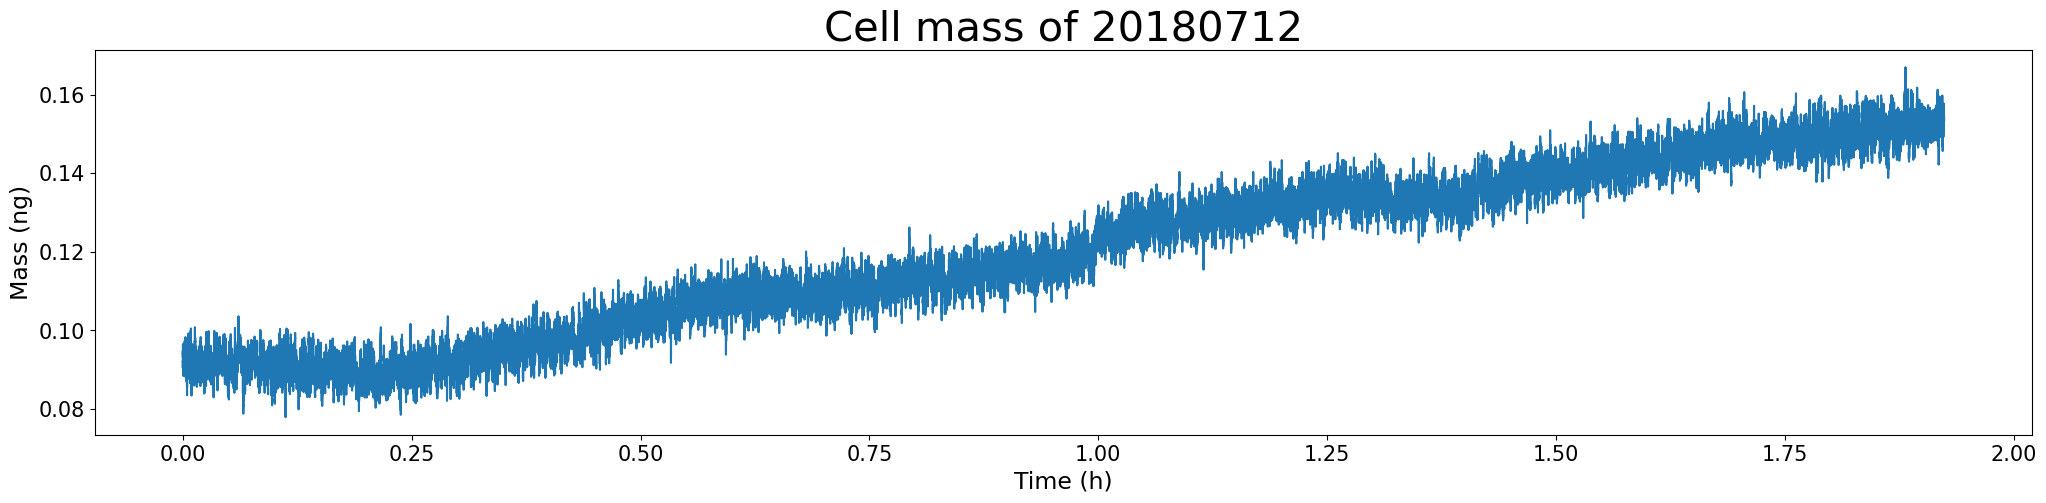

In [18]:
#df712
plt.figure(figsize=(25, 5))
plt.plot(df712["time"],df712["mass"] )
plt.title("Cell mass of 20180712", fontdict={"fontsize": 30})
plt.xlabel('Time (h)', fontsize=17)
plt.ylabel('Mass (ng)', fontsize=17)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

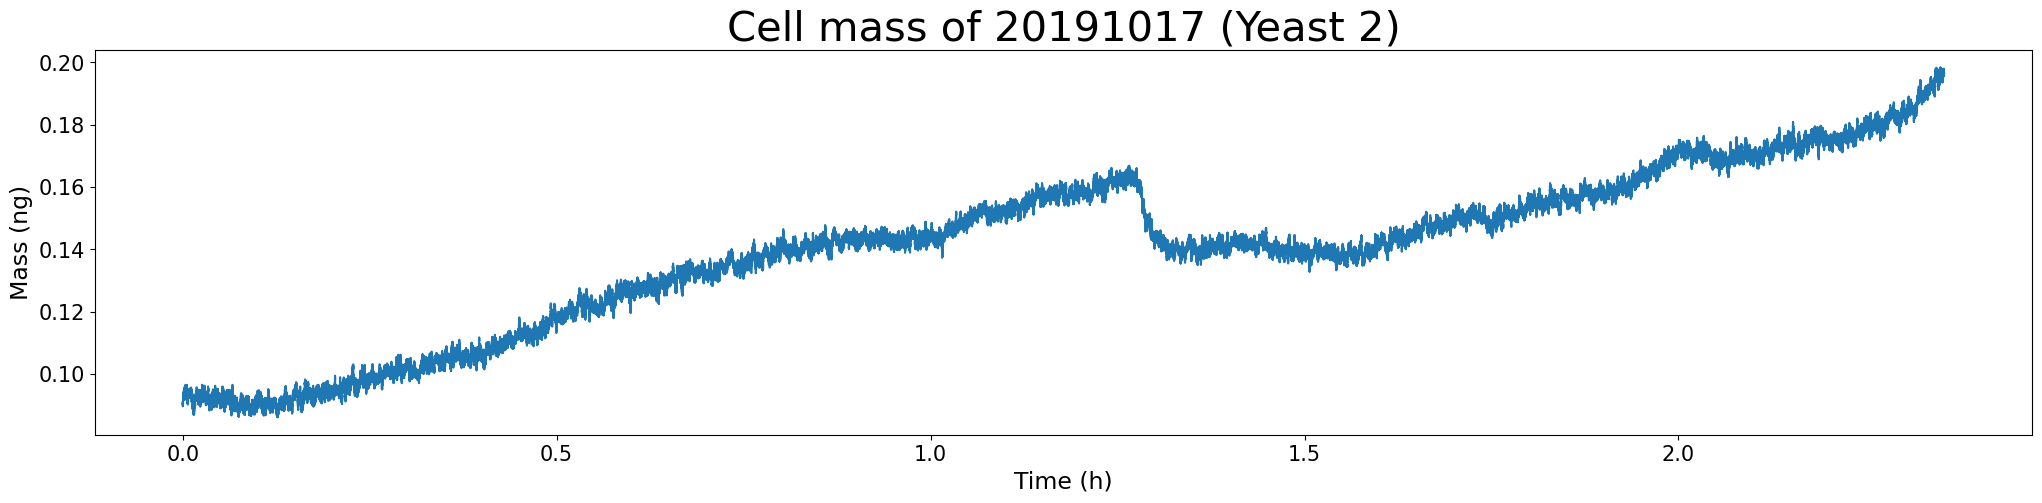

In [19]:
#df17Y2
plt.figure(figsize=(25, 5))
plt.plot(df17Y2["time"],df17Y2["mass"] )
plt.title("Cell mass of 20191017 (Yeast 2)", fontdict={"fontsize": 30})
plt.xlabel('Time (h)', fontsize=17)
plt.ylabel('Mass (ng)', fontsize=17)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.savefig('lav2.pdf', dpi=300, bbox_inches='tight')
plt.show() 

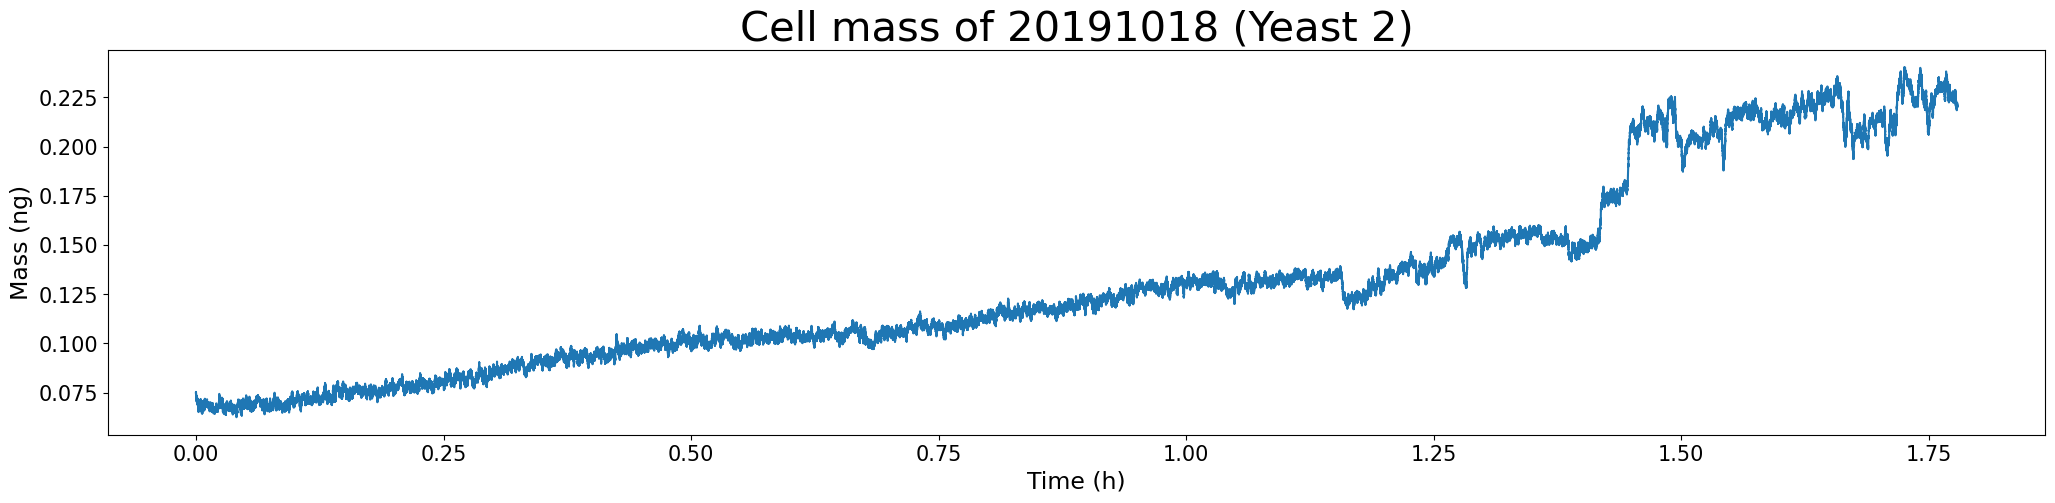

In [20]:
#df18Y2
plt.figure(figsize=(25, 5))
plt.plot(df18Y2["time"],df18Y2["mass"] )
plt.title("Cell mass of 20191018 (Yeast 2)", fontdict={"fontsize": 30})
plt.xlabel('Time (h)', fontsize=17)
plt.ylabel('Mass (ng)', fontsize=17)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.savefig('lav21.pdf', dpi=300, bbox_inches='tight')
plt.show() 

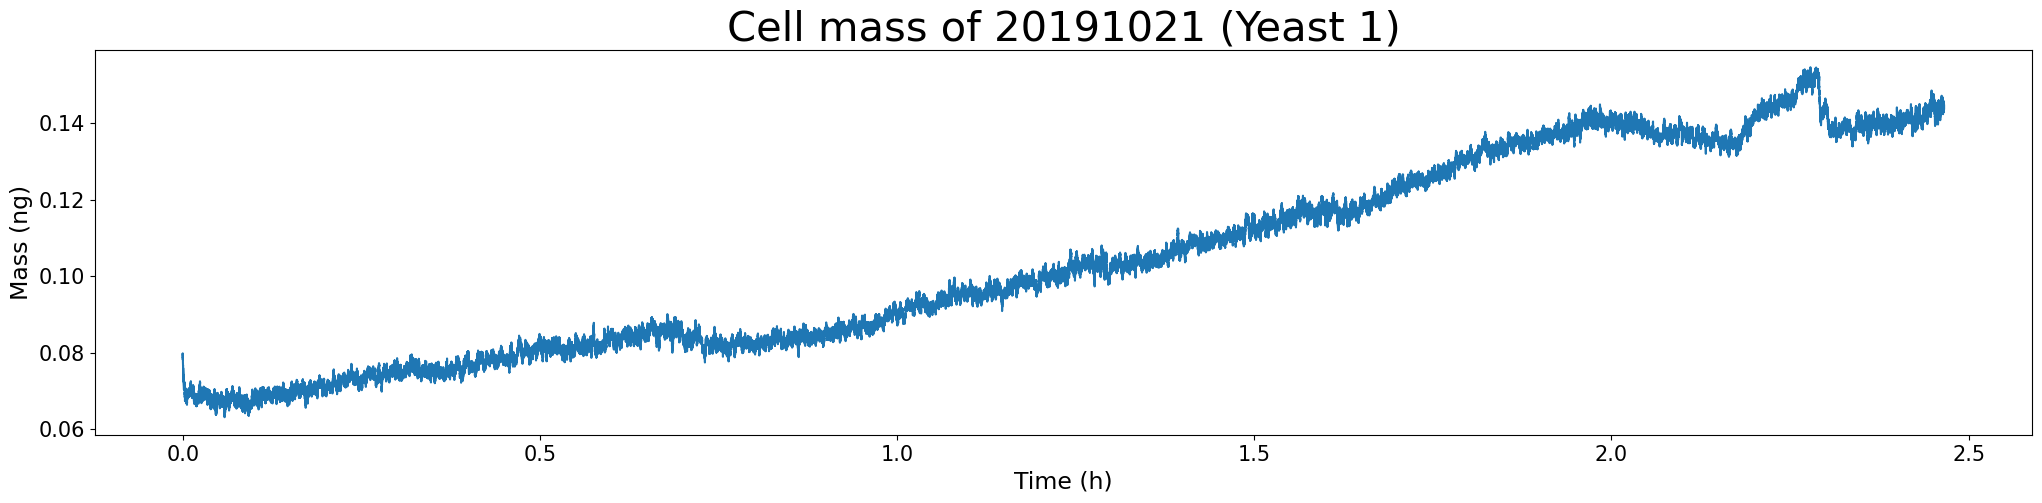

In [21]:
#df21Y1
plt.figure(figsize=(25, 5))
plt.plot(df21Y1["time"],df21Y1["mass"] )
plt.title("Cell mass of 20191021 (Yeast 1)", fontdict={"fontsize": 30})
plt.xlabel('Time (h)', fontsize=17)
plt.ylabel('Mass (ng)', fontsize=17)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show() 

# Calculating MP/Motifs/Discords on each

It is recommended to use different window sizes when detecting motifs and discords using the matrix profile. This is because the optimal window size for detecting motifs may be different from that for detecting discords.

# 20180612

In [34]:
x = df612.index
y = df612['mass']

In [ ]:
#for motifs
m = 6000
mp = stumpy.stump(df612['mass'], m)

In [ ]:
mp_df = pd.DataFrame(mp, columns=['profile', 'profile index', 'left profile index', 'right profile index'])

In [ ]:
best_motif = mp_df[mp_df['profile'] == mp_df['profile'].min()]
best_motif

In [ ]:
prof_df = mp_df[['profile']]

fig, ax = plt.subplots(2, figsize=(16,7), sharex=True)
graph1 = sns.lineplot(y=y, x=x, ax=ax[0])
graph2 = sns.lineplot(data=prof_df, ax=ax[1])

for idx in best_motif.index.to_list():
    graph1.axvline(x=idx, color="green")
    graph2.axvline(x=idx, color="green")
    rect = Rectangle((idx, 0), m, 40, facecolor="lightgrey")
    graph1.add_patch(rect)

ax[0].set_xlabel('Matrix Profile Index', fontsize=15)
ax[0].set_ylabel('Mass (ng)', fontsize=15)

ax[1].set_xlabel('Matrix Profile Index', fontsize=15)
ax[1].set_ylabel('Matrix Profile Values', fontsize=15)

plt.suptitle('Finding Motifs', fontsize=20)


In [ ]:
fig, ax = plt.subplots(figsize=(16,4))

for idx in best_motif.index.to_list():
    plot_y = y.iloc[idx:(idx+m)].to_list()
    sns.lineplot(data=plot_y, ax=ax, linewidth=3)
    plt.xlabel('Index Length', fontsize=15)
    plt.ylabel('Mass (ng)', fontsize=15)

ax.set_title('Motifs Comparison', fontsize=20)

In [ ]:
#TWO Y-AXIS
fig, ax1 = plt.subplots(figsize=(16,4))

idx1 = best_motif.index[0]
plot_y1 = y.iloc[idx1:(idx1+m)].to_list()
sns.lineplot(data=plot_y1, ax=ax1, label='Motif 1', linewidth =3)
ax1.set_xlabel('Index Length', fontsize=15)
ax1.set_ylabel('Mass (ng)', fontsize=15)
ax1.tick_params(axis='y', labelcolor='blue')
ax1.legend(loc='upper left')

ax2 = ax1.twinx()

idx2 = best_motif.index[1]
plot_y2 = y.iloc[idx2:(idx2+m)].to_list()
sns.lineplot(data=plot_y2, ax=ax2, label='Motif 2', color='orange', linewidth =3)
ax2.tick_params(axis='y', labelcolor='orange')
ax2.legend(loc='upper right')

plt.title('Motifs Comparison', fontsize=20)
plt.show()

In [ ]:
#for discord
m1 = 24000
mp1 = stumpy.stump(df612['mass'], m1)

In [ ]:
mp_df1 = pd.DataFrame(mp1, columns=['profile', 'profile index', 'left profile index', 'right profile index'])

In [ ]:
discord = mp_df1[mp_df1['profile'] == mp_df1['profile'].max()]
discord

In [ ]:
prof_df1 = mp_df1[['profile']] 
fig, ax = plt.subplots(2, figsize=(17,6), sharex=True)
sns.lineplot(y=y, x=x, ax=ax[0])
ax[0].set_xlabel('Matrix Profile Index', fontsize=15) 
ax[0].set_ylabel('Mass (ng)', fontsize=17) 
sns.lineplot(data=prof_df1, ax=ax[1])
ax[1].set_xlabel('Matrix Profile Index', fontsize=15) 
ax[1].set_ylabel('Matrix Profile Values', fontsize=15) 

rect = Rectangle((discord.index[0], 0), m1, 40, facecolor="lightgrey")
ax[0].add_patch(rect)
ax[1].axvline(x=[discord.index[0]], color='C1')

plt.suptitle('Findig a Discord', fontsize=20)


In [ ]:
nearest_neighbor_distance = mp1[discord.index, 0]

print(f"The nearest neighbor subsequence to this discord is {nearest_neighbor_distance} units away")

# 20180711

In [ ]:
y = df11['mass']
x = df11.index

In [ ]:
#for motifs
m = 6000
mp = stumpy.stump(df11['mass'], m)

In [ ]:
mp_df = pd.DataFrame(mp, columns=['profile', 'profile index', 'left profile index', 'right profile index'])

In [ ]:
best_motif = mp_df[mp_df['profile'] == mp_df['profile'].min()]
best_motif

In [ ]:
prof_df = mp_df[['profile']]

fig, ax = plt.subplots(2, figsize=(16,7), sharex=True)
graph1 = sns.lineplot(y=y, x=x, ax=ax[0])
graph2 = sns.lineplot(data=prof_df, ax=ax[1])

for idx in best_motif.index.to_list():
    graph1.axvline(x=idx, color="green")
    graph2.axvline(x=idx, color="green")
    rect = Rectangle((idx, 0), m, 40, facecolor="lightgrey")
    graph1.add_patch(rect)

ax[0].set_xlabel('Matrix Profile Index', fontsize=15)
ax[0].set_ylabel('Mass (ng)', fontsize=15)

ax[1].set_xlabel('Matrix Profile Index', fontsize=15)
ax[1].set_ylabel('Matrix Profile Values', fontsize=15)

plt.suptitle('Finding Motifs', fontsize=20)

In [ ]:
fig, ax = plt.subplots(figsize=(16,4))

for idx in best_motif.index.to_list():
    plot_y = y.iloc[idx:(idx+m)].to_list()
    sns.lineplot(data=plot_y, ax=ax, linewidth=3)
    plt.xlabel('Index Length', fontsize=15)
    plt.ylabel('Mass (ng)', fontsize=15)

ax.set_title('Motifs Comparison', fontsize=20)

In [ ]:
#TWO Y-AXIS
fig, ax1 = plt.subplots(figsize=(16,4))

idx1 = best_motif.index[0]
plot_y1 = y.iloc[idx1:(idx1+m)].to_list()
sns.lineplot(data=plot_y1, ax=ax1, label='Motif 1', linewidth =3)
ax1.set_xlabel('Index Length', fontsize=15)
ax1.set_ylabel('Mass (ng)', fontsize=15)
ax1.tick_params(axis='y', labelcolor='blue')
ax1.legend(loc='upper left')

ax2 = ax1.twinx()

idx2 = best_motif.index[1]
plot_y2 = y.iloc[idx2:(idx2+m)].to_list()
sns.lineplot(data=plot_y2, ax=ax2, label='Motif 2', color='orange', linewidth =3)
ax2.tick_params(axis='y', labelcolor='orange')
ax2.legend(loc='upper right')

plt.title('Motifs Comparison', fontsize=20)
plt.show()

In [ ]:
#for discord
m1 = 24000
mp1 = stumpy.stump(df11['mass'], m1)

In [ ]:
mp_df1 = pd.DataFrame(mp1, columns=['profile', 'profile index', 'left profile index', 'right profile index'])

In [ ]:
discord = mp_df1[mp_df1['profile'] == mp_df1['profile'].max()]
discord

In [ ]:
prof_df1 = mp_df1[['profile']] 
fig, ax = plt.subplots(2, figsize=(17,6), sharex=True)
sns.lineplot(y=y, x=x, ax=ax[0])
ax[0].set_xlabel('Matrix Profile Index', fontsize=15) 
ax[0].set_ylabel('Mass (ng)', fontsize=17) 
sns.lineplot(data=prof_df1, ax=ax[1])
ax[1].set_xlabel('Matrix Profile Index', fontsize=15) 
ax[1].set_ylabel('Matrix Profile Values', fontsize=15) 

rect = Rectangle((discord.index[0], 0), m1, 40, facecolor="lightgrey")
ax[0].add_patch(rect)
ax[1].axvline(x=[discord.index[0]], color='C1')

plt.suptitle('Findig a Discord', fontsize=20)


In [ ]:
nearest_neighbor_distance = mp1[discord.index, 0]

print(f"The nearest neighbor subsequence to this discord is {nearest_neighbor_distance} units away")  

# 20180712

In [ ]:
x = df712.index
y = df712['mass']

In [ ]:
#for motifs
m = 6000
mp = stumpy.stump(df712['mass'], m)

In [ ]:
mp_df = pd.DataFrame(mp, columns=['profile', 'profile index', 'left profile index', 'right profile index'])

In [ ]:
best_motif = mp_df[mp_df['profile'] == mp_df['profile'].min()]
best_motif

In [ ]:
prof_df = mp_df[['profile']]

fig, ax = plt.subplots(2, figsize=(16,7), sharex=True)
graph1 = sns.lineplot(y=y, x=x, ax=ax[0])
graph2 = sns.lineplot(data=prof_df, ax=ax[1])

for idx in best_motif.index.to_list():
    graph1.axvline(x=idx, color="green")
    graph2.axvline(x=idx, color="green")
    rect = Rectangle((idx, 0), m, 40, facecolor="lightgrey")
    graph1.add_patch(rect)

ax[0].set_xlabel('Matrix Profile Index', fontsize=15)
ax[0].set_ylabel('Mass (ng)', fontsize=15)

ax[1].set_xlabel('Matrix Profile Index', fontsize=15)
ax[1].set_ylabel('Matrix Profile Values', fontsize=15)

plt.suptitle('Finding Motifs', fontsize=20)


In [ ]:
fig, ax = plt.subplots(figsize=(16,4))

for idx in best_motif.index.to_list():
    plot_y = y.iloc[idx:(idx+m)].to_list()
    sns.lineplot(data=plot_y, ax=ax, linewidth=3)
    plt.xlabel('Index Length', fontsize=15)
    plt.ylabel('Mass (ng)', fontsize=15)

ax.set_title('Motifs Comparison', fontsize=20)

In [ ]:
#TWO Y-AXIS
fig, ax1 = plt.subplots(figsize=(16,4))

idx1 = best_motif.index[0]
plot_y1 = y.iloc[idx1:(idx1+m)].to_list()
sns.lineplot(data=plot_y1, ax=ax1, label='Motif 1', linewidth =3)
ax1.set_xlabel('Index Length', fontsize=15)
ax1.set_ylabel('Mass (ng)', fontsize=15)
ax1.tick_params(axis='y', labelcolor='blue')
ax1.legend(loc='upper left')

ax2 = ax1.twinx()

idx2 = best_motif.index[1]
plot_y2 = y.iloc[idx2:(idx2+m)].to_list()
sns.lineplot(data=plot_y2, ax=ax2, label='Motif 2', color='orange', linewidth =3)
ax2.tick_params(axis='y', labelcolor='orange')
ax2.legend(loc='upper right')

plt.title('Motifs Comparison', fontsize=20)
plt.show()

In [ ]:
#for discord
m1 = 24000
mp1 = stumpy.stump(df712['mass'], m1)

In [ ]:
mp_df1 = pd.DataFrame(mp1, columns=['profile', 'profile index', 'left profile index', 'right profile index'])

In [ ]:
discord = mp_df1[mp_df1['profile'] == mp_df1['profile'].max()]
discord

In [ ]:
prof_df1 = mp_df1[['profile']] 
fig, ax = plt.subplots(2, figsize=(17,6), sharex=True)
sns.lineplot(y=y, x=x, ax=ax[0])
ax[0].set_xlabel('Matrix Profile Index', fontsize=15) 
ax[0].set_ylabel('Mass (ng)', fontsize=17) 
sns.lineplot(data=prof_df1, ax=ax[1])
ax[1].set_xlabel('Matrix Profile Index', fontsize=15) 
ax[1].set_ylabel('Matrix Profile Values', fontsize=15) 

rect = Rectangle((discord.index[0], 0), m1, 40, facecolor="lightgrey")
ax[0].add_patch(rect)
ax[1].axvline(x=[discord.index[0]], color='C1')

plt.suptitle('Findig a Discord', fontsize=20)


In [ ]:
nearest_neighbor_distance = mp1[discord.index, 0]

print(f"The nearest neighbor subsequence to this discord is {nearest_neighbor_distance} units away")

# 20191017 (Yeast 1)

In [ ]:
x = df17Y1.index
y = df17Y1['mass']

In [ ]:
#for motifs
m = 6000
mp = stumpy.stump(df17Y1['mass'], m)

In [ ]:
mp_df = pd.DataFrame(mp, columns=['profile', 'profile index', 'left profile index', 'right profile index'])

In [ ]:
best_motif = mp_df[mp_df['profile'] == mp_df['profile'].min()]
best_motif

In [ ]:
prof_df = mp_df[['profile']]

fig, ax = plt.subplots(2, figsize=(16,7), sharex=True)
graph1 = sns.lineplot(y=y, x=x, ax=ax[0])
graph2 = sns.lineplot(data=prof_df, ax=ax[1])

for idx in best_motif.index.to_list():
    graph1.axvline(x=idx, color="green")
    graph2.axvline(x=idx, color="green")
    rect = Rectangle((idx, 0), m, 40, facecolor="lightgrey")
    graph1.add_patch(rect)

ax[0].set_xlabel('Matrix Profile Index', fontsize=15)
ax[0].set_ylabel('Mass (ng)', fontsize=15)

ax[1].set_xlabel('Matrix Profile Index', fontsize=15)
ax[1].set_ylabel('Matrix Profile Values', fontsize=15)

plt.suptitle('Finding Motifs', fontsize=20)

In [ ]:
fig, ax = plt.subplots(figsize=(16,4))

for idx in best_motif.index.to_list():
    plot_y = y.iloc[idx:(idx+m)].to_list()
    sns.lineplot(data=plot_y, ax=ax, linewidth=3)
    plt.xlabel('Index Length', fontsize=15)
    plt.ylabel('Mass (ng)', fontsize=15)

ax.set_title('Motifs Comparison', fontsize=20)

In [ ]:
#TWO Y-AXIS
fig, ax1 = plt.subplots(figsize=(16,4))

idx1 = best_motif.index[0]
plot_y1 = y.iloc[idx1:(idx1+m)].to_list()
sns.lineplot(data=plot_y1, ax=ax1, label='Motif 1', linewidth =3)
ax1.set_xlabel('Index Length', fontsize=15)
ax1.set_ylabel('Mass (ng)', fontsize=15)
ax1.tick_params(axis='y', labelcolor='blue')
ax1.legend(loc='upper left')

ax2 = ax1.twinx()

idx2 = best_motif.index[1]
plot_y2 = y.iloc[idx2:(idx2+m)].to_list()
sns.lineplot(data=plot_y2, ax=ax2, label='Motif 2', color='orange', linewidth =3)
ax2.tick_params(axis='y', labelcolor='orange')
ax2.legend(loc='upper right')

plt.title('Motifs Comparison', fontsize=20)
plt.show()

In [ ]:
#for discord
m1 = 24000
mp1 = stumpy.stump(df17Y1['mass'], m1)

In [ ]:
mp_df1 = pd.DataFrame(mp1, columns=['profile', 'profile index', 'left profile index', 'right profile index'])

In [ ]:
discord = mp_df1[mp_df1['profile'] == mp_df1['profile'].max()]
discord

In [ ]:
prof_df1 = mp_df1[['profile']] 
fig, ax = plt.subplots(2, figsize=(17,6), sharex=True)
sns.lineplot(y=y, x=x, ax=ax[0])
ax[0].set_xlabel('Matrix Profile Index', fontsize=15) 
ax[0].set_ylabel('Mass (ng)', fontsize=17) 
sns.lineplot(data=prof_df1, ax=ax[1])
ax[1].set_xlabel('Matrix Profile Index', fontsize=15)
ax[1].set_ylabel('Matrix Profile Values', fontsize=15) 

rect = Rectangle((discord.index[0], 0), m1, 40, facecolor="lightgrey")
ax[0].add_patch(rect)
ax[1].axvline(x=[discord.index[0]], color='C1')

plt.suptitle('Findig a Discord', fontsize=20)


In [ ]:
nearest_neighbor_distance = mp1[discord.index, 0]

print(f"The nearest neighbor subsequence to this discord is {nearest_neighbor_distance} units away")

# 20191017 (Yeast 2)

In [ ]:
y = df17Y2['mass']
x = df17Y2.index

In [ ]:
#for motifs
m = 6000
mp = stumpy.stump(df17Y2['mass'], m)

In [ ]:
mp_df = pd.DataFrame(mp, columns=['profile', 'profile index', 'left profile index', 'right profile index'])

In [ ]:
best_motif = mp_df[mp_df['profile'] == mp_df['profile'].min()]
best_motif

In [ ]:
prof_df = mp_df[['profile']]

fig, ax = plt.subplots(2, figsize=(16,7), sharex=True)
graph1 = sns.lineplot(y=y, x=x, ax=ax[0])
graph2 = sns.lineplot(data=prof_df, ax=ax[1])

for idx in best_motif.index.to_list():
    graph1.axvline(x=idx, color="green")
    graph2.axvline(x=idx, color="green")
    rect = Rectangle((idx, 0), m, 40, facecolor="lightgrey")
    graph1.add_patch(rect)

ax[0].set_xlabel('Matrix Profile Index', fontsize=15)
ax[0].set_ylabel('Mass (ng)', fontsize=15)

ax[1].set_xlabel('Matrix Profile Index', fontsize=15)
ax[1].set_ylabel('Matrix Profile Values', fontsize=15)

plt.suptitle('Finding Motifs', fontsize=20)

In [ ]:
fig, ax = plt.subplots(figsize=(16,4))

for idx in best_motif.index.to_list():
    plot_y = y.iloc[idx:(idx+m)].to_list()
    sns.lineplot(data=plot_y, ax=ax, linewidth=3)
    plt.xlabel('Index Length', fontsize=15)
    plt.ylabel('Mass (ng)', fontsize=15)

ax.set_title('Motifs Comparison', fontsize=20)

In [ ]:
#TWO Y-AXIS
fig, ax1 = plt.subplots(figsize=(16,4))

idx1 = best_motif.index[0]
plot_y1 = y.iloc[idx1:(idx1+m)].to_list()
sns.lineplot(data=plot_y1, ax=ax1, label='Motif 1', linewidth =3)
ax1.set_xlabel('Index Length', fontsize=15)
ax1.set_ylabel('Mass (ng)', fontsize=15)
ax1.tick_params(axis='y', labelcolor='blue')
ax1.legend(loc='upper left')

ax2 = ax1.twinx()

idx2 = best_motif.index[1]
plot_y2 = y.iloc[idx2:(idx2+m)].to_list()
sns.lineplot(data=plot_y2, ax=ax2, label='Motif 2', color='orange', linewidth =3)
ax2.tick_params(axis='y', labelcolor='orange')
ax2.legend(loc='upper right')

plt.title('Motifs Comparison', fontsize=20)
plt.show()

In [ ]:
#for discord
m1 = 24000
mp1 = stumpy.stump(df17Y2['mass'], m1)

In [ ]:
mp_df1 = pd.DataFrame(mp1, columns=['profile', 'profile index', 'left profile index', 'right profile index'])

In [ ]:
discord = mp_df1[mp_df1['profile'] == mp_df1['profile'].max()]
discord

In [ ]:
prof_df1 = mp_df1[['profile']] 
fig, ax = plt.subplots(2, figsize=(17,6), sharex=True)
sns.lineplot(y=y, x=x, ax=ax[0])
ax[0].set_xlabel('Matrix Profile Index', fontsize=15) 
ax[0].set_ylabel('Mass (ng)', fontsize=17)
sns.lineplot(data=prof_df1, ax=ax[1])
ax[1].set_xlabel('Matrix Profile Index', fontsize=15) 
ax[1].set_ylabel('Matrix Profile Values', fontsize=15) 

rect = Rectangle((discord.index[0], 0), m1, 40, facecolor="lightgrey")
ax[0].add_patch(rect)
ax[1].axvline(x=[discord.index[0]], color='C1')

plt.suptitle('Findig a Discord', fontsize=20)


In [ ]:
nearest_neighbor_distance = mp1[discord.index, 0]

print(f"The nearest neighbor subsequence to this discord is {nearest_neighbor_distance} units away")

# 20191018 (Yeast 2)

In [ ]:
y = df18Y2['mass']
x = df18Y2.index

In [ ]:
#for motifs
m = 6000
mp = stumpy.stump(df18Y2['mass'], m)

In [ ]:
mp_df = pd.DataFrame(mp, columns=['profile', 'profile index', 'left profile index', 'right profile index'])

In [ ]:
best_motif = mp_df[mp_df['profile'] == mp_df['profile'].min()]
best_motif

In [ ]:
prof_df = mp_df[['profile']]

fig, ax = plt.subplots(2, figsize=(16,7), sharex=True)
graph1 = sns.lineplot(y=y, x=x, ax=ax[0])
graph2 = sns.lineplot(data=prof_df, ax=ax[1])

for idx in best_motif.index.to_list():
    graph1.axvline(x=idx, color="green")
    graph2.axvline(x=idx, color="green")
    rect = Rectangle((idx, 0), m, 40, facecolor="lightgrey")
    graph1.add_patch(rect)

ax[0].set_xlabel('Matrix Profile Index', fontsize=15)
ax[0].set_ylabel('Mass (ng)', fontsize=15)

ax[1].set_xlabel('Matrix Profile Index', fontsize=15)
ax[1].set_ylabel('Matrix Profile Values', fontsize=15)

plt.suptitle('Finding Motifs', fontsize=20)

In [ ]:
fig, ax = plt.subplots(figsize=(16,4))

for idx in best_motif.index.to_list():
    plot_y = y.iloc[idx:(idx+m)].to_list()
    sns.lineplot(data=plot_y, ax=ax, linewidth=3)
    plt.xlabel('Index Length', fontsize=15)
    plt.ylabel('Mass (ng)', fontsize=15)

ax.set_title('Motifs Comparison', fontsize=20)

In [ ]:
#TWO Y-AXIS
fig, ax1 = plt.subplots(figsize=(16,4))

idx1 = best_motif.index[0]
plot_y1 = y.iloc[idx1:(idx1+m)].to_list()
sns.lineplot(data=plot_y1, ax=ax1, label='Motif 1', linewidth =3)
ax1.set_xlabel('Index Length', fontsize=15)
ax1.set_ylabel('Mass (ng)', fontsize=15)
ax1.tick_params(axis='y', labelcolor='blue')
ax1.legend(loc='upper left')

ax2 = ax1.twinx()

idx2 = best_motif.index[1]
plot_y2 = y.iloc[idx2:(idx2+m)].to_list()
sns.lineplot(data=plot_y2, ax=ax2, label='Motif 2', color='orange', linewidth =3)
ax2.tick_params(axis='y', labelcolor='orange')
ax2.legend(loc='upper right')

plt.title('Motifs Comparison', fontsize=20)
plt.show()

In [ ]:
#for discord
m1 = 24000
mp1 = stumpy.stump(df18Y2['mass'], m1)

In [ ]:
mp_df1 = pd.DataFrame(mp1, columns=['profile', 'profile index', 'left profile index', 'right profile index'])

In [ ]:
discord = mp_df1[mp_df1['profile'] == mp_df1['profile'].max()]
discord

In [ ]:
prof_df1 = mp_df1[['profile']] 
fig, ax = plt.subplots(2, figsize=(17,6), sharex=True)
sns.lineplot(y=y, x=x, ax=ax[0])
ax[0].set_xlabel('Matrix Profile Index', fontsize=15) 
ax[0].set_ylabel('Mass (ng)', fontsize=17) 
sns.lineplot(data=prof_df1, ax=ax[1])
ax[1].set_xlabel('Matrix Profile Index', fontsize=15) 
ax[1].set_ylabel('Matrix Profile Values', fontsize=15) 

rect = Rectangle((discord.index[0], 0), m1, 40, facecolor="lightgrey")
ax[0].add_patch(rect)
ax[1].axvline(x=[discord.index[0]], color='C1')

plt.suptitle('Findig a Discord', fontsize=20)


In [ ]:
nearest_neighbor_distance = mp1[discord.index, 0]

print(f"The nearest neighbor subsequence to this discord is {nearest_neighbor_distance} units away")

# 20191021 (Yeast 1)

In [ ]:
y = df21Y1['mass']
x = df21Y1.index

In [ ]:
#for motifs
m = 6000
mp = stumpy.stump(df21Y1['mass'], m)

In [ ]:
mp_df = pd.DataFrame(mp, columns=['profile', 'profile index', 'left profile index', 'right profile index'])

In [ ]:
best_motif = mp_df[mp_df['profile'] == mp_df['profile'].min()]
best_motif

In [ ]:
prof_df = mp_df[['profile']]

fig, ax = plt.subplots(2, figsize=(16,7), sharex=True)
graph1 = sns.lineplot(y=y, x=x, ax=ax[0])
graph2 = sns.lineplot(data=prof_df, ax=ax[1])

for idx in best_motif.index.to_list():
    graph1.axvline(x=idx, color="green")
    graph2.axvline(x=idx, color="green")
    rect = Rectangle((idx, 0), m, 40, facecolor="lightgrey")
    graph1.add_patch(rect)

ax[0].set_xlabel('Matrix Profile Index', fontsize=15)
ax[0].set_ylabel('Mass (ng)', fontsize=15)

ax[1].set_xlabel('Matrix Profile Index', fontsize=15)
ax[1].set_ylabel('Matrix Profile Values', fontsize=15)

plt.suptitle('Finding Motifs', fontsize=20)

In [ ]:
fig, ax = plt.subplots(figsize=(16,4))

for idx in best_motif.index.to_list():
    plot_y = y.iloc[idx:(idx+m)].to_list()
    sns.lineplot(data=plot_y, ax=ax, linewidth=3)
    plt.xlabel('Index Length', fontsize=15)
    plt.ylabel('Mass (ng)', fontsize=15)

ax.set_title('Motifs Comparison', fontsize=20)

In [ ]:
#TWO Y-AXIS
fig, ax1 = plt.subplots(figsize=(16,4))

idx1 = best_motif.index[0]
plot_y1 = y.iloc[idx1:(idx1+m)].to_list()
sns.lineplot(data=plot_y1, ax=ax1, label='Motif 1', linewidth =3)
ax1.set_xlabel('Index Length', fontsize=15)
ax1.set_ylabel('Mass (ng)', fontsize=15)
ax1.tick_params(axis='y', labelcolor='blue')
ax1.legend(loc='upper left')

ax2 = ax1.twinx()

idx2 = best_motif.index[1]
plot_y2 = y.iloc[idx2:(idx2+m)].to_list()
sns.lineplot(data=plot_y2, ax=ax2, label='Motif 2', color='orange', linewidth =3)
ax2.tick_params(axis='y', labelcolor='orange')
ax2.legend(loc='upper right')

plt.title('Motifs Comparison', fontsize=20)
plt.show()

In [ ]:
#for discord
m1 = 24000
mp1 = stumpy.stump(df21Y1['mass'], m1)

In [ ]:
mp_df1 = pd.DataFrame(mp1, columns=['profile', 'profile index', 'left profile index', 'right profile index'])

In [ ]:
discord = mp_df1[mp_df1['profile'] == mp_df1['profile'].max()]
discord

In [ ]:
prof_df1 = mp_df1[['profile']] 
fig, ax = plt.subplots(2, figsize=(17,6), sharex=True)
sns.lineplot(y=y, x=x, ax=ax[0])
ax[0].set_xlabel('Matrix Profile Index', fontsize=15) 
ax[0].set_ylabel('Mass (ng)', fontsize=17) 
sns.lineplot(data=prof_df1, ax=ax[1])
ax[1].set_xlabel('Matrix Profile Index', fontsize=15) 
ax[1].set_ylabel('Matrix Profile Values', fontsize=15) 

rect = Rectangle((discord.index[0], 0), m1, 40, facecolor="lightgrey")
ax[0].add_patch(rect)
ax[1].axvline(x=[discord.index[0]], color='C1')

plt.suptitle('Findig a Discord', fontsize=20)

In [ ]:
nearest_neighbor_distance = mp1[discord.index, 0]

print(f"The nearest neighbor subsequence to this discord is {nearest_neighbor_distance} units away")

# Finding Similar Patterns in Datasets

Comparing the datasets that have similar trajectory and shape to find hidden similar patterns

# 20180711 and 20180712

In [ ]:
m = 6000
mp11 = stumpy.stump(T_A = df11['mass'],
                  m = m,
                  T_B = df712['mass'],
                  ignore_trivial = False)

In [ ]:
df11_motif_index = mp11[:, 0].argmin()
plt.xlabel('Subsequence', fontsize=17)
plt.ylabel('Matrix Profile', fontsize=17)
plt.scatter(df11_motif_index,
               mp11[df11_motif_index, 0],
               c='red',
               s=100)
plt.plot(mp11[:,0])
plt.show()

In [ ]:
df11_motif_index = mp11[:, 0].argmin()
print(f'The motif is located at index {df11_motif_index} of "20180711"')

In [ ]:
df712_motif_index = mp11[df11_motif_index, 1]
print(f'The motif is located at index {df712_motif_index} of "20180712"')

In [ ]:
plt.plot(df11['mass'].iloc[df11_motif_index : df11_motif_index + m].values, label='20180711', linewidth=3)
plt.plot(df712['mass'].iloc[df712_motif_index:df712_motif_index+m].values, label='20180712', linewidth=3)

plt.title('Similar Patterns in Datasets 20180711 and 20180712', fontsize=19)
plt.xlabel('Index Length', fontsize=17)
plt.ylabel('Mass (ng)', fontsize=17)

plt.legend()

plt.show()

In [ ]:
#TWO Y-AXIS
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()

ax1.plot(df11['mass'].iloc[df11_motif_index : df11_motif_index + m].values, label='20180711', linewidth=3, color='tab:blue')
ax2.plot(df712['mass'].iloc[df712_motif_index:df712_motif_index+m].values, label='20180712', linewidth=3, color='tab:orange')

ax1.set_xlabel('Index Length', fontsize=17)
ax1.set_ylabel('Mass (ng) - Dataset 1', fontsize=17)
ax2.set_ylabel('Mass (ng) - Dataset 2', fontsize=17)

ax1.tick_params(axis='y', labelcolor='tab:blue')
ax2.tick_params(axis='y', labelcolor='tab:orange')

plt.title('Similar Patterns in Datasets 20180711 and 20180712', fontsize=19)

plt.legend()

plt.show()



In [ ]:
plt.plot(df11['time'].iloc[df11_motif_index : df11_motif_index + m].values, df11['mass'].iloc[df11_motif_index : df11_motif_index + m].values, label='20180711', linewidth=3)
plt.plot(df712['time'].iloc[df712_motif_index : df712_motif_index + m].values, df712['mass'].iloc[df712_motif_index : df712_motif_index + m].values, label='20180712', linewidth=3)

plt.title('Comparison of Fragments in Real Time', fontsize=19)
plt.xlabel('Time (h)', fontsize=17)
plt.ylabel('Mass (ng)', fontsize=17)

plt.legend()
plt.show()

In [ ]:
plt.plot(df712['time'].iloc[df712_motif_index : df712_motif_index + m].values, df712['mass'].iloc[df712_motif_index : df712_motif_index + m].values, label='20180712', linewidth=3)

plt.title('Fragment From 20180712', fontsize=19)
plt.xlabel('Time (h)', fontsize=17)
plt.ylabel('Mass (ng)', fontsize=17)

plt.show()

In [ ]:
plt.plot(df11['time'].iloc[df11_motif_index : df11_motif_index + m].values, df11['mass'].iloc[df11_motif_index : df11_motif_index + m].values, label='20180711', linewidth=3)
plt.title('Fragment From 20180711', fontsize=19)
plt.xlabel('Time (h)', fontsize=17)
plt.ylabel('Mass (ng)', fontsize=17)
plt.show()

# 20191018 (Yeast 2) and 20191021 (Yeast 1)

In [ ]:
m = 6000
mp18Y2 = stumpy.stump(T_A = df18Y2['mass'],
                  m = m,
                  T_B = df21Y1['mass'],
                  ignore_trivial = False)

In [ ]:
df18Y2_motif_index = mp18Y2[:, 0].argmin()
plt.xlabel('Subsequence', fontsize=17)
plt.ylabel('Matrix Profile', fontsize=17)
plt.scatter(df18Y2_motif_index,
               mp18Y2[df18Y2_motif_index, 0],
               c='red',
               s=100)
plt.plot(mp18Y2[:,0])
plt.show()

In [ ]:
df18Y2_motif_index = mp18Y2[:, 0].argmin()
print(f'The motif is located at index {df18Y2_motif_index} of "20191018"')

In [ ]:
df21Y1_motif_index = mp18Y2[df18Y2_motif_index, 1]
print(f'The motif is located at index {df21Y1_motif_index} of "20191021"')

In [ ]:
plt.plot(df18Y2['mass'].iloc[df18Y2_motif_index : df18Y2_motif_index + m].values, label='20191018', linewidth=3)
plt.plot(df21Y1['mass'].iloc[df21Y1_motif_index:df21Y1_motif_index+m].values, label='20191021', linewidth=3)

plt.title('Similar Patterns in Datasets 20191018 (Yeast 2) and 20191021 (Yeast 1)', fontsize=19)

plt.xlabel('Index Length', fontsize=17)
plt.ylabel('Mass (ng)', fontsize=17)

plt.legend()

plt.show()

In [ ]:
#TWO Y-AXIS
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()

ax1.plot(df18Y2['mass'].iloc[df18Y2_motif_index : df18Y2_motif_index + m].values, label='20191018', linewidth=3, color='tab:blue')
ax2.plot(df21Y1['mass'].iloc[df21Y1_motif_index:df21Y1_motif_index+m].values, label='20191021', linewidth=3, color='tab:orange')

ax1.set_xlabel('Index Length', fontsize=17)
ax1.set_ylabel('Mass (ng) - Dataset 1', fontsize=17)
ax2.set_ylabel('Mass (ng) - Dataset 2', fontsize=17)

ax1.tick_params(axis='y', labelcolor='tab:blue')
ax2.tick_params(axis='y', labelcolor='tab:orange')

plt.title('Similar Patterns in Datasets 20191018 (Yeast 2) and 20191021 (Yeast 1)', fontsize=19)

plt.legend()

plt.show()



In [ ]:
plt.plot(df18Y2['time'].iloc[df18Y2_motif_index : df18Y2_motif_index + m].values, df18Y2['mass'].iloc[df18Y2_motif_index : df18Y2_motif_index + m].values, label='20191018', linewidth=3)
plt.plot(df21Y1['time'].iloc[df21Y1_motif_index : df21Y1_motif_index + m].values, df21Y1['mass'].iloc[df21Y1_motif_index : df21Y1_motif_index + m].values, label='20191021', linewidth=3)

plt.title('Comparison of Fragments in Real Time', fontsize=19)
plt.xlabel('Time (h)', fontsize=17)
plt.ylabel('Mass (ng)', fontsize=17)

plt.legend()
plt.show()

In [ ]:
plt.plot(df21Y1['time'].iloc[df21Y1_motif_index : df21Y1_motif_index + m].values, df21Y1['mass'].iloc[df21Y1_motif_index : df21Y1_motif_index + m].values, label='20191021', linewidth=3)

plt.title('Fragment From 20191021 (Yeast 1)', fontsize=19)
plt.xlabel('Time (h)', fontsize=17)
plt.ylabel('Mass (ng)', fontsize=17)
plt.legend()

plt.show()

In [ ]:
plt.plot(df18Y2['time'].iloc[df18Y2_motif_index : df18Y2_motif_index + m].values, df18Y2['mass'].iloc[df18Y2_motif_index : df18Y2_motif_index + m].values, label='20191018', linewidth=3)
plt.title('Fragment From 20191018 (Yeast 2)', fontsize=19)
plt.xlabel('Time (h)', fontsize=17)
plt.ylabel('Mass (ng)', fontsize=17)
plt.show()

# 20180612 and 20191017 (Yeast 2)

In [ ]:
m = 6000
mp612 = stumpy.stump(T_A = df612['mass'],
                  m = m,
                  T_B = df17Y2['mass'],
                  ignore_trivial = False)

In [ ]:
df612_motif_index = mp612[:, 0].argmin()
plt.xlabel('Subsequence', fontsize=17)
plt.ylabel('Matrix Profile', fontsize=17)
plt.scatter(df612_motif_index,
               mp612[df612_motif_index, 0],
               c='red',
               s=100)
plt.plot(mp612[:,0])
plt.show()

In [ ]:
df612_motif_index = mp612[:, 0].argmin()
print(f'The motif is located at index {df18Y2_motif_index} of "20180612"')

In [ ]:
df17Y2_motif_index = mp612[df612_motif_index, 1]
print(f'The motif is located at index {df17Y2_motif_index} of "20191017"')

In [ ]:
plt.plot(df612['mass'].iloc[df612_motif_index : df612_motif_index + m].values, label='20180612', linewidth=3)
plt.plot(df17Y2['mass'].iloc[df17Y2_motif_index:df17Y2_motif_index+m].values, label='20191017', linewidth=3)

plt.title('Similar Patterns in Datasets 20180612 and 20191017', fontsize=19)

plt.xlabel('Index Length', fontsize=17)
plt.ylabel('Mass (ng)', fontsize=17)

plt.legend()

plt.show()

In [ ]:
#TWO Y-AXIS
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()

ax1.plot(df612['mass'].iloc[df612_motif_index : df612_motif_index + m].values, label='20180612', linewidth=3, color='tab:blue')
ax2.plot(df17Y2['mass'].iloc[df17Y2_motif_index:df17Y2_motif_index+m].values, label='20191017', linewidth=3, color='tab:orange')

ax1.set_xlabel('Index Length', fontsize=17)
ax1.set_ylabel('Mass (ng) - Dataset 1', fontsize=17)
ax2.set_ylabel('Mass (ng) - Dataset 2', fontsize=17)

ax1.tick_params(axis='y', labelcolor='tab:blue')
ax2.tick_params(axis='y', labelcolor='tab:orange')

plt.title('Similar Patterns in Datasets 20180612 and 20191017', fontsize=19)

plt.legend()

plt.show()


In [ ]:
plt.plot(df612['time'].iloc[df612_motif_index : df612_motif_index + m].values, df612['mass'].iloc[df612_motif_index : df612_motif_index + m].values, label='20180612', linewidth=3)
plt.plot(df17Y2['time'].iloc[df17Y2_motif_index : df17Y2_motif_index + m].values, df17Y2['mass'].iloc[df17Y2_motif_index : df17Y2_motif_index + m].values, label='20191017', linewidth=3)

plt.title('Comparison of Fragments in Real Time', fontsize=19)
plt.xlabel('Time (h)', fontsize=17)
plt.ylabel('Mass (ng)', fontsize=17)

plt.legend()
plt.show()

In [ ]:
plt.plot(df17Y2['time'].iloc[df17Y2_motif_index : df17Y2_motif_index + m].values, df17Y2['mass'].iloc[df17Y2_motif_index : df17Y2_motif_index + m].values, label='20191017', linewidth=3)

plt.title('Fragment From 20191017 (Yeast 2)', fontsize=19)
plt.xlabel('Time (h)', fontsize=17)
plt.ylabel('Mass (ng)', fontsize=17)
plt.legend()

plt.show()

In [ ]:
plt.plot(df612['time'].iloc[df612_motif_index : df612_motif_index + m].values, df612['mass'].iloc[df612_motif_index : df612_motif_index + m].values, label='20180612', linewidth=3)
plt.title('Fragment From 20180612', fontsize=19)
plt.xlabel('Time (h)', fontsize=17)
plt.ylabel('Mass (ng)', fontsize=17)
plt.show()

# 20191017 AND 20191021 (Yeast 1)

In [ ]:
m = 6000
mp017 = stumpy.stump(T_A = df21Y1['mass'],
                  m = m,
                  T_B = df17Y2['mass'],
                  ignore_trivial = False)

In [ ]:
df21Y1_motif_index = mp017[:, 0].argmin()
plt.xlabel('Subsequence', fontsize=17)
plt.ylabel('Matrix Profile', fontsize=17)
plt.scatter(df17Y2_motif_index,
               mp017[df21Y1_motif_index, 0],
               c='red',
               s=100)
plt.plot(mp017[:,0])
plt.show()

In [ ]:
df21Y1_motif_index = mp017[:, 0].argmin()
print(f'The motif is located at index {df21Y1_motif_index} of "20191021 (Yeast 1)"')

In [ ]:
df17Y2_motif_index = mp017[df21Y1_motif_index, 1]
print(f'The motif is located at index {df17Y2_motif_index} of "20191017"')

In [ ]:
plt.plot(df21Y1['mass'].iloc[df21Y1_motif_index : df21Y1_motif_index + m].values, label='20191021 (Yeast 1)', linewidth=3)
plt.plot(df17Y2['mass'].iloc[df17Y2_motif_index:df17Y2_motif_index+m].values, label='20191017', linewidth=3)

plt.title('Similar Patterns in Datasets 20191021 (Yeast 1) and 20191017', fontsize=19)

plt.xlabel('Index Length', fontsize=17)
plt.ylabel('Mass (ng)', fontsize=17)

plt.legend()

plt.show()

In [ ]:
#TWO Y-AXIS
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()

ax1.plot(df21Y1['mass'].iloc[df21Y1_motif_index : df21Y1_motif_index + m].values, label='20191021 (Yeast 1)', linewidth=3, color='tab:blue')
ax2.plot(df17Y2['mass'].iloc[df17Y2_motif_index:df17Y2_motif_index+m].values, label='20191017', linewidth=3, color='tab:orange')

ax1.set_xlabel('Index Length', fontsize=17)
ax1.set_ylabel('Mass (ng) - Dataset 1', fontsize=17)
ax2.set_ylabel('Mass (ng) - Dataset 2', fontsize=17)

ax1.tick_params(axis='y', labelcolor='tab:blue')
ax2.tick_params(axis='y', labelcolor='tab:orange')

plt.title('Similar Patterns in Datasets 20191021 (Yeast 1) and 20191017', fontsize=19)

plt.legend()

plt.show()


In [ ]:
plt.plot(df21Y1['time'].iloc[df21Y1_motif_index : df21Y1_motif_index + m].values, df21Y1['mass'].iloc[df21Y1_motif_index : df21Y1_motif_index + m].values, label='20191021 (Yeast 1)', linewidth=3)
plt.plot(df17Y2['time'].iloc[df17Y2_motif_index : df17Y2_motif_index + m].values, df17Y2['mass'].iloc[df17Y2_motif_index : df17Y2_motif_index + m].values, label='20191017', linewidth=3)

plt.title('Comparison of Fragments in Real Time', fontsize=19)
plt.xlabel('Time (h)', fontsize=17)
plt.ylabel('Mass (ng)', fontsize=17)

plt.legend()
plt.show()

In [ ]:
plt.plot(df17Y2['time'].iloc[df17Y2_motif_index : df17Y2_motif_index + m].values, df17Y2['mass'].iloc[df17Y2_motif_index : df17Y2_motif_index + m].values, label='20191017', linewidth=3)

plt.title('Fragment From 20191017 (Yeast 2)', fontsize=19)
plt.xlabel('Time (h)', fontsize=17)
plt.ylabel('Mass (ng)', fontsize=17)
plt.legend()

plt.show()

In [ ]:
plt.plot(df21Y1['time'].iloc[df21Y1_motif_index : df21Y1_motif_index + m].values, df21Y1['mass'].iloc[df21Y1_motif_index : df21Y1_motif_index + m].values, label='20191021 (Yeast 1)', linewidth=3)
plt.title('Fragment From 20191021 (Yeast 1)', fontsize=19)
plt.xlabel('Time (h)', fontsize=17)
plt.ylabel('Mass (ng)', fontsize=17)
plt.show()

# 20191018 (Yeast 2) AND 20191017


In [ ]:
m = 6000
mp017 = stumpy.stump(T_A = df18Y2['mass'],
                  m = m,
                  T_B = df17Y2['mass'],
                  ignore_trivial = False)

In [ ]:
df18Y2_motif_index = mp017[:, 0].argmin()
plt.xlabel('Subsequence', fontsize=17)
plt.ylabel('Matrix Profile', fontsize=17)
plt.scatter(df18Y2_motif_index,
               mp017[df18Y2_motif_index, 0],
               c='red',
               s=100)
plt.plot(mp017[:,0])
plt.show()

In [ ]:
df18Y2_motif_index = mp017[:, 0].argmin()
print(f'The motif is located at index {df18Y2_motif_index} of "20191018 (Yeast 2)"')


In [ ]:
df17Y2_motif_index = mp017[df18Y2_motif_index, 1]
print(f'The motif is located at index {df17Y2_motif_index} of "20191017"')

In [ ]:
plt.plot(df18Y2['mass'].iloc[df18Y2_motif_index : df18Y2_motif_index + m].values, label='20191018 (Yeast 2)', linewidth=3)
plt.plot(df17Y2['mass'].iloc[df17Y2_motif_index:df17Y2_motif_index+m].values, label='20191017', linewidth=3)

plt.title('Similar Patterns in Datasets 20191018 (Yeast 2) and 20191017', fontsize=19)

plt.xlabel('Index Length', fontsize=17)
plt.ylabel('Mass (ng)', fontsize=17)

plt.legend()

plt.show()

In [ ]:
#TWO Y-AXIS
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()

ax1.plot(df18Y2['mass'].iloc[df18Y2_motif_index : df18Y2_motif_index + m].values, label='20191018 (Yeast 2)', linewidth=3, color='tab:blue')
ax2.plot(df17Y2['mass'].iloc[df17Y2_motif_index:df17Y2_motif_index+m].values, label='20191017', linewidth=3, color='tab:orange')

ax1.set_xlabel('Index Length', fontsize=17)
ax1.set_ylabel('Mass (ng) - Dataset 1', fontsize=17)
ax2.set_ylabel('Mass (ng) - Dataset 2', fontsize=17)

ax1.tick_params(axis='y', labelcolor='tab:blue')
ax2.tick_params(axis='y', labelcolor='tab:orange')

plt.title('Similar Patterns in Datasets 20191018 (Yeast 2) and 20191017', fontsize=19)

plt.legend()

plt.show()


In [ ]:
plt.plot(df18Y2['time'].iloc[df18Y2_motif_index : df18Y2_motif_index + m].values, df18Y2['mass'].iloc[df18Y2_motif_index : df18Y2_motif_index + m].values, label='20191018 (Yeast 2)', linewidth=3)
plt.plot(df17Y2['time'].iloc[df17Y2_motif_index : df17Y2_motif_index + m].values, df17Y2['mass'].iloc[df17Y2_motif_index : df17Y2_motif_index + m].values, label='20191017', linewidth=3)

plt.title('Comparison of Fragments in Real Time', fontsize=19)
plt.xlabel('Time (h)', fontsize=17)
plt.ylabel('Mass (ng)', fontsize=17)

plt.legend()
plt.show()

In [ ]:
plt.plot(df17Y2['time'].iloc[df17Y2_motif_index : df17Y2_motif_index + m].values, df17Y2['mass'].iloc[df17Y2_motif_index : df17Y2_motif_index + m].values, label='20191017', linewidth=3)

plt.title('Fragment From 20191017 (Yeast 2)', fontsize=19)
plt.xlabel('Time (h)', fontsize=17)
plt.ylabel('Mass (ng)', fontsize=17)
plt.legend()

plt.show()

In [ ]:
plt.plot(df18Y2['time'].iloc[df18Y2_motif_index : df18Y2_motif_index + m].values, df18Y2['mass'].iloc[df18Y2_motif_index : df18Y2_motif_index + m].values, label='20191018 (Yeast 2)', linewidth=3)
plt.title('Fragment From 20191018 (Yeast 2)', fontsize=19)
plt.xlabel('Time (h)', fontsize=17)
plt.ylabel('Mass (ng)', fontsize=17)
plt.show()

# 20191018 (Yeast 2) AND 20180712

In [ ]:
m = 6000
mp712 = stumpy.stump(T_A = df18Y2['mass'],
                  m = m,
                  T_B = df712['mass'],
                  ignore_trivial = False)

In [ ]:
df18Y2_motif_index = mp712[:, 0].argmin()
plt.xlabel('Subsequence', fontsize=17)
plt.ylabel('Matrix Profile', fontsize=17)
plt.scatter(df18Y2_motif_index,
               mp712[df712_motif_index, 0],
               c='red',
               s=100)
plt.plot(mp712[:,0])
plt.show()

In [ ]:
df18Y2_motif_index = mp712[:, 0].argmin()
print(f'The motif is located at index {df18Y2_motif_index} of "20191018 (Yeast 2)"')


In [ ]:
df712_motif_index = mp712[df18Y2_motif_index, 1]
print(f'The motif is located at index {df712_motif_index} of "20180712"')

In [ ]:
plt.plot(df18Y2['mass'].iloc[df18Y2_motif_index : df18Y2_motif_index + m].values, label='20191018 (Yeast 2)', linewidth=3)
plt.plot(df712['mass'].iloc[df712_motif_index:df712_motif_index+m].values, label='20180712', linewidth=3)

plt.title('Similar Patterns in Datasets 20191018 (Yeast 2) and 20180712', fontsize=19)

plt.xlabel('Index Length', fontsize=17)
plt.ylabel('Mass (ng)', fontsize=17)

plt.legend()

plt.show()

In [ ]:
#TWO Y-AXIS
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()

ax1.plot(df18Y2['mass'].iloc[df18Y2_motif_index : df18Y2_motif_index + m].values, label='20191018 (Yeast 2)', linewidth=3, color='tab:blue')
ax2.plot(df712['mass'].iloc[df712_motif_index:df712_motif_index+m].values, label='20180712', linewidth=3, color='tab:orange')

ax1.set_xlabel('Index Length', fontsize=17)
ax1.set_ylabel('Mass (ng) - Dataset 1', fontsize=17)
ax2.set_ylabel('Mass (ng) - Dataset 2', fontsize=17)

ax1.tick_params(axis='y', labelcolor='tab:blue')
ax2.tick_params(axis='y', labelcolor='tab:orange')

plt.title('Similar Patterns in Datasets 20191018 (Yeast 2) and 20180712', fontsize=19)

plt.legend()

plt.show()


In [ ]:
plt.plot(df18Y2['time'].iloc[df18Y2_motif_index : df18Y2_motif_index + m].values, df18Y2['mass'].iloc[df18Y2_motif_index : df18Y2_motif_index + m].values, label='20191018 (Yeast 2)', linewidth=3)
plt.plot(df712['time'].iloc[df712_motif_index : df712_motif_index + m].values, df712['mass'].iloc[df712_motif_index : df712_motif_index + m].values, label='20180712', linewidth=3)

plt.title('Comparison of Fragments in Real Time', fontsize=19)
plt.xlabel('Time (h)', fontsize=17)
plt.ylabel('Mass (ng)', fontsize=17)

plt.legend()
plt.show()

In [ ]:
plt.plot(df712['time'].iloc[df712_motif_index : df712_motif_index + m].values, df712['mass'].iloc[df712_motif_index : df712_motif_index + m].values, label='20180712', linewidth=3)

plt.title('Fragment From 20180712', fontsize=19)
plt.xlabel('Time (h)', fontsize=17)
plt.ylabel('Mass (ng)', fontsize=17)
plt.legend()

plt.show()

In [ ]:
plt.plot(df18Y2['time'].iloc[df18Y2_motif_index : df18Y2_motif_index + m].values, df18Y2['mass'].iloc[df18Y2_motif_index : df18Y2_motif_index + m].values, label='20191018 (Yeast 2)', linewidth=3)
plt.title('Fragment From 20191018 (Yeast 2)', fontsize=19)
plt.xlabel('Time (h)', fontsize=17)
plt.ylabel('Mass (ng)', fontsize=17)
plt.show()

# 20180612 AND 20191018 (Yeast 2)

In [ ]:
m = 6000
mp612 = stumpy.stump(T_A = df18Y2['mass'],
                  m = m,
                  T_B = df612['mass'],
                  ignore_trivial = False)

In [ ]:
df18Y2_motif_index = mp612[:, 0].argmin()
plt.xlabel('Subsequence', fontsize=17)
plt.ylabel('Matrix Profile', fontsize=17)
plt.scatter(df18Y2_motif_index,
               mp612[df612_motif_index, 0],
               c='red',
               s=100)
plt.plot(mp612[:,0])
plt.show()

In [ ]:
df18Y2_motif_index = mp612[:, 0].argmin()
print(f'The motif is located at index {df18Y2_motif_index} of "20191018 (Yeast 2)"')


In [ ]:
df612_motif_index = mp612[df18Y2_motif_index, 1]
print(f'The motif is located at index {df612_motif_index} of "20180612"')

In [ ]:
plt.plot(df18Y2['mass'].iloc[df18Y2_motif_index : df18Y2_motif_index + m].values, label='20191018 (Yeast 2)', linewidth=3)
plt.plot(df612['mass'].iloc[df612_motif_index:df612_motif_index+m].values, label='20180612', linewidth=3)

plt.title('Similar Patterns in Datasets 20191018 (Yeast 2) and 20180612', fontsize=19)

plt.xlabel('Index Length', fontsize=17)
plt.ylabel('Mass (ng)', fontsize=17)

plt.legend()

plt.show()

In [ ]:
#TWO Y-AXIS
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()

ax1.plot(df18Y2['mass'].iloc[df18Y2_motif_index : df18Y2_motif_index + m].values, label='20191018 (Yeast 2)', linewidth=3, color='tab:blue')
ax2.plot(df612['mass'].iloc[df612_motif_index:df612_motif_index+m].values, label='20180612', linewidth=3, color='tab:orange')

ax1.set_xlabel('Index Length', fontsize=17)
ax1.set_ylabel('Mass (ng) - Dataset 1', fontsize=17)
ax2.set_ylabel('Mass (ng) - Dataset 2', fontsize=17)

ax1.tick_params(axis='y', labelcolor='tab:blue')
ax2.tick_params(axis='y', labelcolor='tab:orange')

plt.title('Similar Patterns in Datasets 20191018 (Yeast 2) and 20180612', fontsize=19)

plt.legend()

plt.show()


In [ ]:
plt.plot(df18Y2['time'].iloc[df18Y2_motif_index : df18Y2_motif_index + m].values, df18Y2['mass'].iloc[df18Y2_motif_index : df18Y2_motif_index + m].values, label='20191018 (Yeast 2)', linewidth=3)
plt.plot(df612['time'].iloc[df612_motif_index : df612_motif_index + m].values, df612['mass'].iloc[df612_motif_index : df612_motif_index + m].values, label='20180612', linewidth=3)

plt.title('Comparison of Fragments in Real Time', fontsize=19)
plt.xlabel('Time (h)', fontsize=17)
plt.ylabel('Mass (ng)', fontsize=17)

plt.legend()
plt.show()

In [ ]:
plt.plot(df612['time'].iloc[df612_motif_index : df612_motif_index + m].values, df612['mass'].iloc[df612_motif_index : df612_motif_index + m].values, label='20180612', linewidth=3)

plt.title('Fragment From 20180612', fontsize=19)
plt.xlabel('Time (h)', fontsize=17)
plt.ylabel('Mass (ng)', fontsize=17)
plt.legend()

plt.show()

In [ ]:
plt.plot(df18Y2['time'].iloc[df18Y2_motif_index : df18Y2_motif_index + m].values, df18Y2['mass'].iloc[df18Y2_motif_index : df18Y2_motif_index + m].values, label='20191018 (Yeast 2)', linewidth=3)
plt.title('Fragment From 20191018 (Yeast 2)', fontsize=19)
plt.xlabel('Time (h)', fontsize=17)
plt.ylabel('Mass (ng)', fontsize=17)
plt.show()

# 20180612 VS 20191021 (Yeast 1)

In [ ]:
m = 6000
mp612 = stumpy.stump(T_A = df21Y1['mass'],
                  m = m,
                  T_B = df612['mass'],
                  ignore_trivial = False)

In [ ]:
df21Y1_motif_index = mp612[:, 0].argmin()
plt.xlabel('Subsequence', fontsize=17)
plt.ylabel('Matrix Profile', fontsize=17)
plt.scatter(df21Y1_motif_index,
               mp612[df612_motif_index, 0],
               c='red',
               s=100)
plt.plot(mp612[:,0])
plt.show()

In [ ]:
df21Y1_motif_index = mp612[:, 0].argmin()
print(f'The motif is located at index {df21Y1_motif_index} of "20191021 (Yeast 1)"')


In [ ]:
df612_motif_index = mp612[df21Y1_motif_index, 1]
print(f'The motif is located at index {df612_motif_index} of "20180612"')

In [ ]:
plt.plot(df21Y1['mass'].iloc[df21Y1_motif_index : df21Y1_motif_index + m].values, label='20191021 (Yeast 1)', linewidth=3)
plt.plot(df612['mass'].iloc[df612_motif_index:df612_motif_index+m].values, label='20180612', linewidth=3)

plt.title('Similar Patterns in Datasets 20191021 (Yeast 1) and 20180612', fontsize=19)

plt.xlabel('Index Length', fontsize=17)
plt.ylabel('Mass (ng)', fontsize=17)

plt.legend()

plt.show()

In [ ]:
#TWO Y-AXIS
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()

ax1.plot(df21Y1['mass'].iloc[df21Y1_motif_index : df21Y1_motif_index + m].values, label='20191021 (Yeast 1)', linewidth=3, color='tab:blue')
ax2.plot(df612['mass'].iloc[df612_motif_index:df612_motif_index+m].values, label='20180612', linewidth=3, color='tab:orange')

ax1.set_xlabel('Index Length', fontsize=17)
ax1.set_ylabel('Mass (ng) - Dataset 1', fontsize=17)
ax2.set_ylabel('Mass (ng) - Dataset 2', fontsize=17)

ax1.tick_params(axis='y', labelcolor='tab:blue')
ax2.tick_params(axis='y', labelcolor='tab:orange')

plt.title('Similar Patterns in Datasets 20191021 (Yeast 1) and 20180612', fontsize=19)

plt.legend()

plt.show()


In [ ]:
plt.plot(df21Y1['time'].iloc[df21Y1_motif_index : df21Y1_motif_index + m].values, df21Y1['mass'].iloc[df21Y1_motif_index : df21Y1_motif_index + m].values, label='20191021 (Yeast 1)', linewidth=3)
plt.plot(df612['time'].iloc[df612_motif_index : df612_motif_index + m].values, df612['mass'].iloc[df612_motif_index : df612_motif_index + m].values, label='20180612', linewidth=3)

plt.title('Comparison of Fragments in Real Time', fontsize=19)
plt.xlabel('Time (h)', fontsize=17)
plt.ylabel('Mass (ng)', fontsize=17)

plt.legend()
plt.show()

In [ ]:
plt.plot(df612['time'].iloc[df612_motif_index : df612_motif_index + m].values, df612['mass'].iloc[df612_motif_index : df612_motif_index + m].values, label='20180612', linewidth=3)

plt.title('Fragment From 20180612', fontsize=19)
plt.xlabel('Time (h)', fontsize=17)
plt.ylabel('Mass (ng)', fontsize=17)
plt.legend()

plt.show()

In [ ]:
plt.plot(df21Y1['time'].iloc[df21Y1_motif_index : df21Y1_motif_index + m].values, df21Y1['mass'].iloc[df21Y1_motif_index : df21Y1_motif_index + m].values, label='20191021 (Yeast 1)', linewidth=3)
plt.title('Fragment From 20191021 (Yeast 1)', fontsize=19)
plt.xlabel('Time (h)', fontsize=17)
plt.ylabel('Mass (ng)', fontsize=17)
plt.show()